In [87]:
import os
import numpy as np
import pickle
import random

In [ ]:
def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = list(filter(None, words))
    return words

In [99]:
def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

In [101]:
def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "/Users/chenwangyang/Downloads/hw3-sentiment/data/pos"
    neg_path = "/Users/chenwangyang/Downloads/hw3-sentiment/data/neg"
    
    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)
    
    review = pos_review + neg_review
    random.shuffle(review)
    pickle.dump(review, open('/Users/chenwangyang/Downloads/hw3-sentiment/review.p', 'wb'))

In [102]:
shuffle_data()

In [104]:
# Define train and test set
os.chdir('/Users/chenwangyang/Downloads/hw3-sentiment')
review = pickle.load(open('review.p', 'rb'))
train = review[:1500]
test = review[1500:]

In [127]:
# function to convert a list of words into a sparse bag-of-words representation
def to_sparse(list):
    from collections import Counter
    sparse = Counter(list)
    return sparse

In [132]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum([d1.get(f, 0) * v for f, v in d2.items()])

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale


In [171]:
# Pegasos algorithm
def pegasos_sgd(X, lambda_reg, iter_num):
    i,t = 0,1
    theta = dict()
    while(i<iter_num):
        i += 1
        for j in range(len(X)):
            t=t+1
            y = X[j][-1]
            word_bag = to_sparse(X[j][:-1])
            eta = 1/(lambda_reg*t)
            theta_copy = theta.copy()
            increment(theta, -eta*lambda_reg, theta)
            if y* dotProduct(word_bag, theta_copy) < 1:
                increment(theta, eta*y, word_bag)
    return theta             

In [172]:
pegasos_sgd(train,1,1)

{'okay': -9.187475757969439e-18,
 'i': 0.04663557628247833,
 'just': -0.044636908727515016,
 "don't": -0.021985343104596995,
 'know': -0.015323117921385777,
 'why': -0.05263157894736841,
 'but': -0.003997335109926702,
 'seem': 0.009327115256495672,
 'to': -0.029980013324450445,
 'be': -0.07395069953364426,
 'getting': 1.920359690719496e-18,
 'this': -0.0779480346435711,
 'diversion': 0.0006662225183211186,
 'disneymade': -0.0006662225183211219,
 'reallife': 0.0026648900732844758,
 'actors': -0.017988007994670215,
 'movies': 0.03530979347101931,
 'as': 0.09260493004663559,
 'well': 0.052631578947368335,
 'acting': -0.02131912058627583,
 'tim': -0.015989340439706855,
 'allen': -0.005329780146568952,
 "couldn't": -0.0033311125916056,
 'even': -0.06662225183211194,
 'make': -0.04863424383744179,
 'it': 0.02598267821452369,
 'through': -0.007994670219853452,
 'the': 0.05929380413057949,
 'santa': -5.521413328766944e-19,
 'clause': 0.0,
 'so': -0.04063957361758822,
 'did': -0.016655562958027

In [159]:
def pegasos_sgd_fast(X, lambda_reg, iter_num):
    i,t,s = 0,1,1
    theta = dict()
    while(i < iter_num):
        i += 1
        for j in range(len(X)):
            t = t+1
            y = X[j][-1]
            word_bag = to_sparse(X[j][:-1])
            eta = 1/(lambda_reg*t)
            s = s*(1-eta*lambda_reg)
            theta_copy = theta.copy()
            if y*dotProduct(word_bag, theta_copy)<1:
                increment(theta, eta*y/s, word_bag)
            w = dict()
            increment(w,s,theta)
        return w

In [236]:
w = pegasos_sgd_fast(train,1,1)

In [237]:
w

{'okay': -0.004663557628247842,
 'i': -0.0019986675549633574,
 'just': -0.03597601598934053,
 "don't": -0.011992005329780167,
 'know': -0.01932045303131247,
 'why': -0.05063291139240512,
 'but': 0.010659560293137927,
 'seem': 0.007328447701532309,
 'to': -0.0059960026648900955,
 'be': -0.05529646902065298,
 'getting': 0.0013324450366422407,
 'this': -0.023984010659560368,
 'diversion': -1.109483369045795e-18,
 'disneymade': -0.0006662225183211207,
 'reallife': 0.0006662225183211196,
 'actors': -0.016655562958028,
 'movies': 0.03264490339773488,
 'as': 0.05796135909393735,
 'well': 0.04463690872751501,
 'acting': -0.01998667554963358,
 'tim': -0.01065956029313792,
 'allen': -0.013990672884743514,
 "couldn't": -0.004663557628247845,
 'even': -0.04263824117255171,
 'make': -0.029980013324450397,
 'it': 0.005996002664890108,
 'through': -0.007328447701532301,
 'the': 0.07061958694203865,
 'santa': 0.001332445036642238,
 'clause': -0.0006662225183211215,
 'so': -0.042638241172551605,
 'did'

In [211]:
# percent error calculation
def single_error(line, w):
    y = line[-1]
    x = to_sparse(line[:-1])
    if y*dotProduct(x,w)<0:
        return 1
    else:
        return 0
    
def percent_error(X, w):
    loss = 0
    for line in X:
        loss += single_error(line, w)
    return loss/len(X)

In [212]:
percent_error(train,w)

0.472

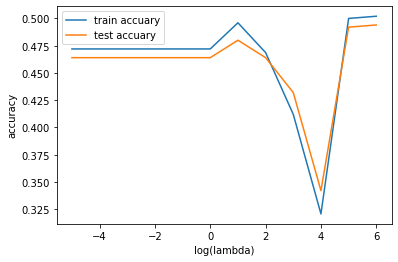

In [218]:
# Find the best lambda
train_list = []
test_list = []
for i in range(-5,7):
    lambda_reg = 10**i
    w = pegasos_sgd_fast(train, lambda_reg, 2)
    train_list.append(percent_error(train,w))
    test_list.append(percent_error(test,w))

import matplotlib.pyplot as plt
plt.plot(range(-5,7), train_list, label = "train accuary")
plt.plot(range(-5,7), test_list, label = "test accuary")
plt.xlabel("log(lambda)")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.show()

In [238]:
# Error analysis
w = pegasos_sgd_fast(train, 1, 2)
i = 0
while(dotProduct(to_sparse(train[i][:-1]),w)*train[i][-1]>0):
    i=i+1
wrong = train[i]

In [264]:
wrong_x = to_sparse(wrong[:-1])
score = {f:w[f]*v for f,v in wrong_x.items()}

In [265]:
import pandas as pd
pd.DataFrame({'score':score, 'w':w, 'number':wrong_x}).sort_values(by='score').head(20)

,score,w,number
have,-0.463025,-0.092605,5.0
in,-0.158561,-0.022652,7.0
on,-0.138574,-0.069287,2.0
be,-0.110593,-0.055296,2.0
or,-0.101932,-0.033977,3.0
that,-0.091939,-0.015323,6.0
at,-0.089274,-0.044637,2.0
a,-0.086609,-0.008661,10.0
movie,-0.083944,-0.041972,2.0
two,-0.083944,-0.027981,3.0
